   Daily Cases  Total Cases  Total Deaths Daily Cases_Equal_Width_Bins  \
0            1            1             0                         Bin1   
1            0            1             0                         Bin1   
2            4            5             0                         Bin1   
3            1            6             0                         Bin1   
4           12           18             0                         Bin1   

  Daily Cases_Equal_Frequency_Bins Total Cases_Equal_Width_Bins  \
0                             Bin1                         Bin1   
1                             Bin1                         Bin1   
2                             Bin1                         Bin1   
3                             Bin1                         Bin1   
4                             Bin1                         Bin1   

  Total Cases_Equal_Frequency_Bins Total Deaths_Equal_Width_Bins  \
0                             Bin1                          Bin1   
1               

C:\Users\PATNALA PADMANABHAM\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for k=3: 0.6489293014893461
        Date  Daily Cases  Total Cases  Cluster
0  3/11/2020            1            1        2
1  3/12/2020            0            1        2
2  3/13/2020            4            5        2
3  3/14/2020            1            6        2
4  3/15/2020           12           18        2
Accuracy: 97.77777777777777

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00        25
           2       0.90      1.00      0.95         9

    accuracy                           0.98        45
   macro avg       0.97      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



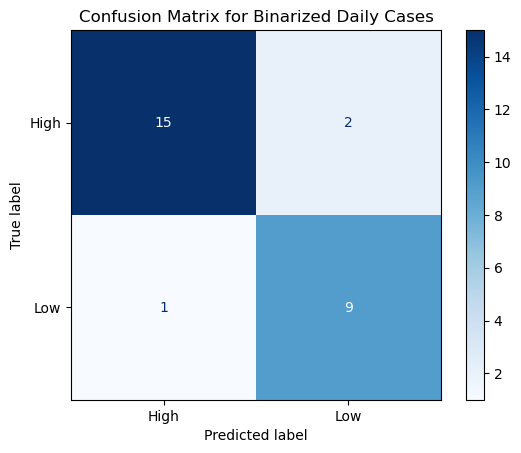

In [299]:
###########################################################Data Discretization###########################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv('Covid19-Turkey.csv')
columns_to_discretize = ['Daily Cases', 'Total Cases','Total Deaths']
num_bins = 5
for col in columns_to_discretize:
    data[f'{col}_Equal_Width_Bins'] = pd.cut(data[col], bins=num_bins, labels=[f'Bin{i+1}' for i in range(num_bins)])
for col in columns_to_discretize:
    data[f'{col}_Equal_Frequency_Bins'] = pd.qcut(data[col], q=num_bins, labels=[f'Bin{i+1}' for i in range(num_bins)])
print(data[[*columns_to_discretize, f'{columns_to_discretize[0]}_Equal_Width_Bins', f'{columns_to_discretize[0]}_Equal_Frequency_Bins',f'{columns_to_discretize[1]}_Equal_Width_Bins', f'{columns_to_discretize[1]}_Equal_Frequency_Bins',f'{columns_to_discretize[2]}_Equal_Width_Bins', f'{columns_to_discretize[2]}_Equal_Frequency_Bins']].head())
print("Original Data:")
print(data.head())

features = data[['Daily Cases', 'Total Cases', 'Active Cases', 'Total Recovered', 'Total Deaths']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)
data['Cluster'] = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score for k={k}: {silhouette_avg}')
print(data[['Date', 'Daily Cases', 'Total Cases', 'Cluster']].head())

features = data[['Daily Cases', 'Total Cases', 'Active Cases', 'Total Recovered', 'Total Deaths']]
target = data['Cluster']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
class_centroids = {}
for label in np.unique(y_train):
    class_centroids[label] = X_train_scaled[y_train == label].mean(axis=0)
def minimum_distance_classifier(X, centroids):
    predictions = []
    for x in X:
        distances = {label: np.linalg.norm(x - centroid) for label, centroid in centroids.items()}
        predicted_class = min(distances, key=distances.get)
        predictions.append(predicted_class)
    return np.array(predictions)
y_pred = minimum_distance_classifier(X_test_scaled, class_centroids)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {(accuracy)*100}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


threshold = data['Daily Cases'].median()
data['Daily Cases Category'] = ['Low' if x <= threshold else 'High' for x in data['Daily Cases']]
data = data.dropna(subset=['Total Cases', 'Active Cases', 'Total Recovered', 'Total Deaths', 'Daily Cases Category'])
data = data[(data[['Total Cases', 'Active Cases', 'Total Recovered', 'Total Deaths']] != 0).all(axis=1)]
features = ['Total Cases', 'Active Cases', 'Total Recovered', 'Total Deaths'] 
target = 'Daily Cases Category'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Binarized Daily Cases")
plt.show()


Index(['Date', 'Daily Cases', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Daily Test Cases', 'Total Intensive Care',
       'Intubated Cases', 'Case incrase rate %', 'Daily(Cases/Test) %',
       '(Recovered / Active Cases) %', '(Death / Active Cases) %',
       '(Active Cases / Population) %'],
      dtype='object')
Dataset has nulls
          Date  Daily Cases  Total Cases  Total Deaths  Total Recovered  Active Cases  Daily Test Cases Total Intensive Care  Intubated Cases  Case incrase rate %  Daily(Cases/Test) %  (Recovered / Active Cases) %  (Death / Active Cases) %  (Active Cases / Population) %
16  2020-03-27         2069         5698            92               42          5564              7533                  344              241                57.02                27.47                          0.76                      1.66                       0.006613
17  2020-03-28         1704         7402           108               70          7224      

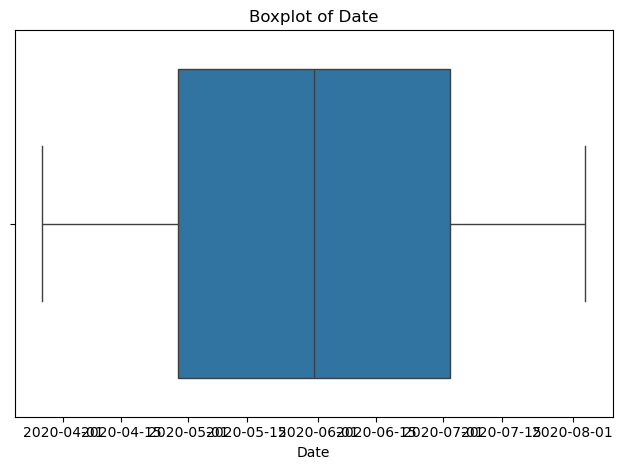

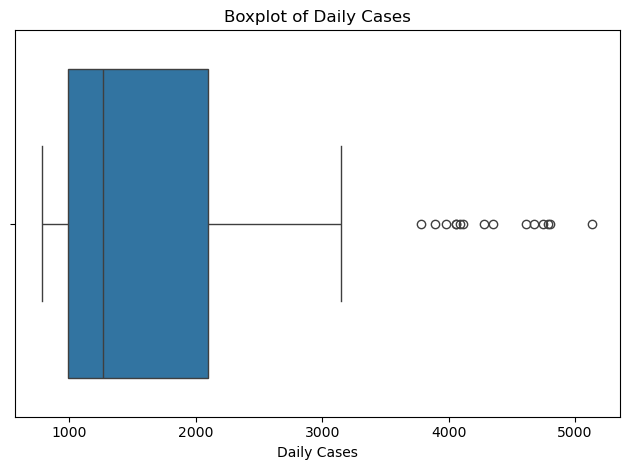

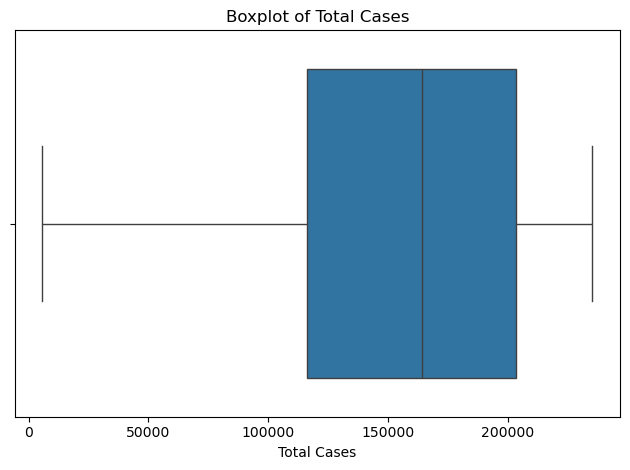

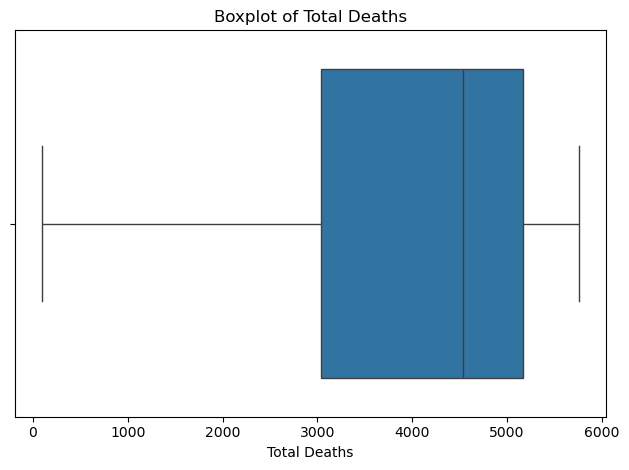

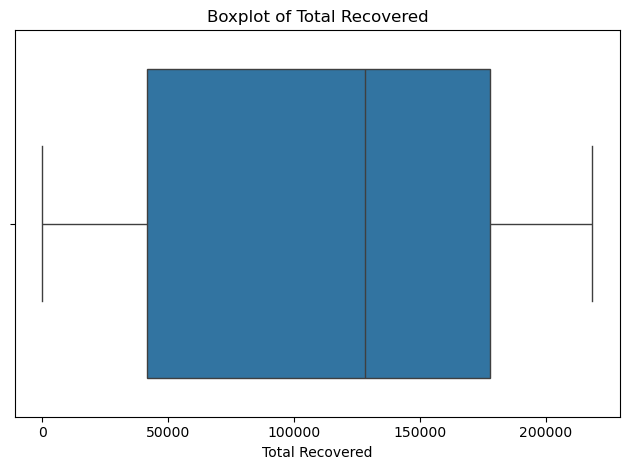

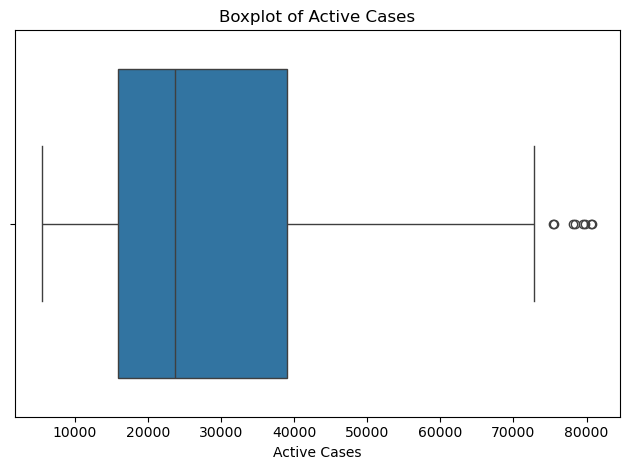

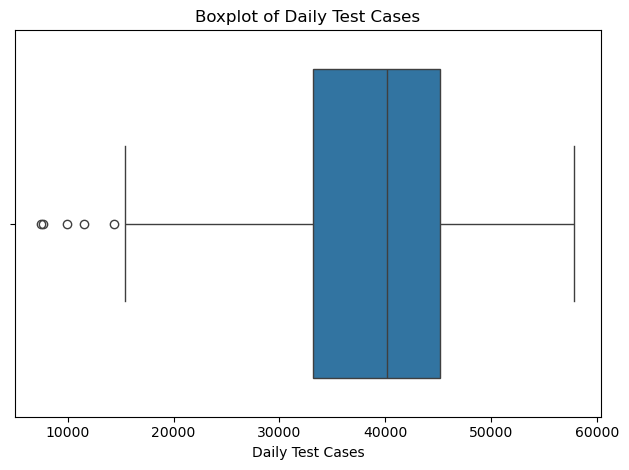

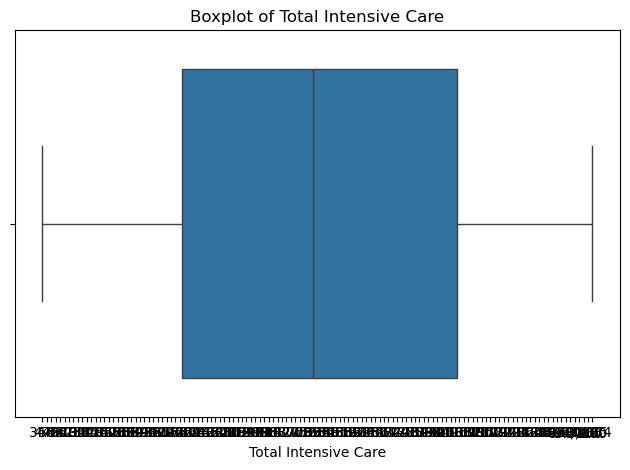

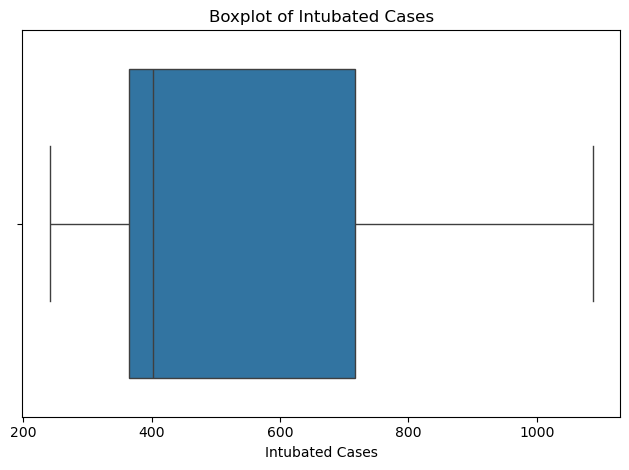

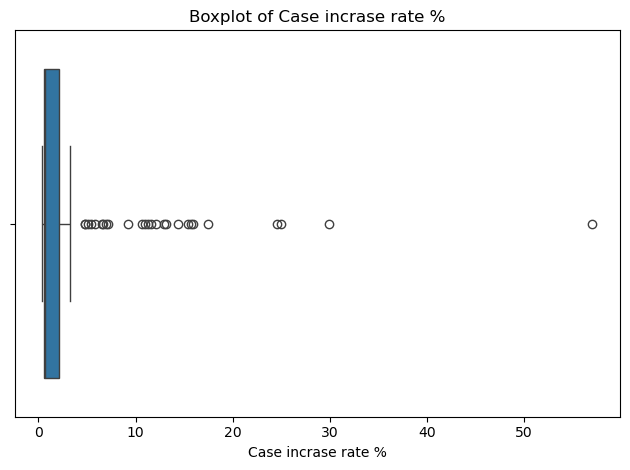

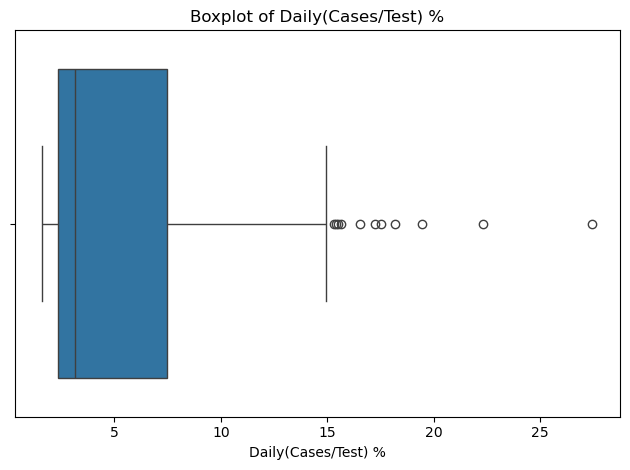

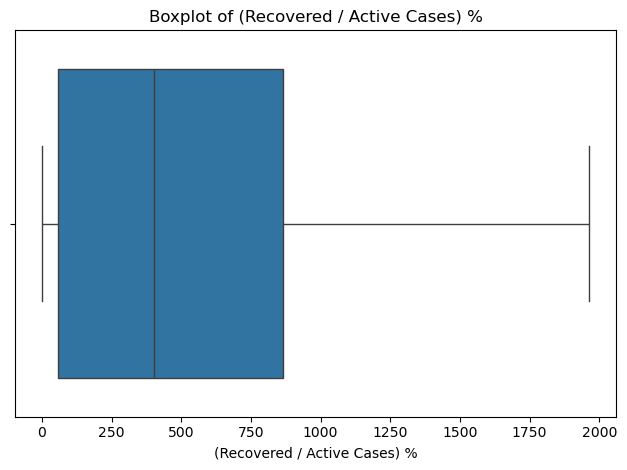

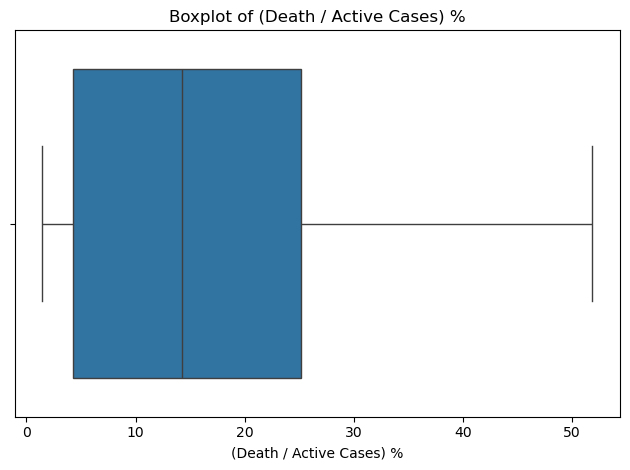


Number of Duplicate Rows: 0
no duplicates in the data set
-678.75
3767.25
34306.875
311545.875
2477.5
6993.5
-4731.125
308059.875
-15358.625
64578.375
19552.25
62902.25
134.0
654.0
0.10499999999999998
1.105
0.9887500000000002
4.17875
-774.3687500000002
2903.4612500000003
-12.847499999999997
74.4125
-0.004249185000000001
0.048475235000000005
Cleaned Data:
          Date  Daily Cases  Total Cases  Total Deaths  Total Recovered  Active Cases  Daily Test Cases  Intubated Cases  Case incrase rate %  Daily(Cases/Test) %  (Recovered / Active Cases) %  (Death / Active Cases) %  (Active Cases / Population) %
61  2020-05-11         1114       139771          3841            95780         40150             32722              578                 0.81                 3.41                        238.56                      9.57                       0.047718
66  2020-05-16         1610       148067          4096           108137         35834             42236              474                 1.10 

In [257]:
#################################################################data cleaning###############################################################
data = pd.read_csv('Covid19-Turkey.csv')
columns = data.columns
print(columns)
a=data.isnull().values.any()
if(a==True):
    print('Dataset has nulls')
    data= data.dropna(subset=['Total Intensive Care'])
else:
    print('No nulls in the data set')

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

for col in columns:
    
    if pd.api.types.is_float_dtype(data[col]) and (data[col] % 1 == 0).all():
        data[col] = data[col].astype(int)

data = data.drop_duplicates()

print(data.to_string())
for i, feature in enumerate(data.columns[:-1], 1):
    sns.boxplot(data, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()
duplicates = data.duplicated()
print(f"\nNumber of Duplicate Rows: {duplicates.sum()}")
if(duplicates.sum()==0):
    print('no duplicates in the data set')
else:
    data.drop_duplicates(inplace=False)
data.drop('Total Intensive Care', axis=1, inplace=True)
numeric_columns= data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    lower_limit = data[col].quantile(0.25)
    upper_limit = data[col].quantile(0.75)
    IQR=upper_limit-lower_limit
    lower_bound = lower_limit - 1.5 * IQR
    upper_bound = upper_limit + 1.5 * IQR
    print(lower_bound)
    print(upper_bound)
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Cleaned Data:")
print(data.to_string())

# for col in numeric_columns:
#     lower_limit = data[col].quantile(0.25)
#     upper_limit = data[col].quantile(0.75)
#     data[col] = np.clip(data[col], lower_limit, upper_limit)
# print("Cleaned Data:")
# data.to_csv('cleaned_data.csv',index=False)
# data = pd.read_csv('cleaned_data.csv')
# print(data.to_string())




In [297]:
####################################################################data smoothing#########################################################################
alpha = 0.5
data['Daily Cases (ExpSmooth)'] = data['Daily Cases'].ewm(alpha=alpha).mean()

data['Total Cases (ExpSmooth)'] = data['Total Cases'].ewm(alpha=alpha).mean()

print(data[['Date', 'Daily Cases','Total Cases','Total Cases (ExpSmooth)', 'Daily Cases (ExpSmooth)']].to_string())


          Date  Daily Cases  Total Cases  Total Cases (ExpSmooth)  Daily Cases (ExpSmooth)
14   3/25/2020          561         2433              2433.000000               561.000000
15   3/26/2020         1196         3629              3230.333333               984.333333
16   3/27/2020         2069         5698              4640.428571              1604.142857
17   3/28/2020         1704         7402              6113.266667              1657.400000
18   3/29/2020         1815         9217              7715.193548              1738.741935
19   3/30/2020         1610        10827              9295.793651              1673.349206
20   3/31/2020         2704        13531             11430.070866              2192.732283
21    4/1/2020         2148        15679             13562.866667              2170.278431
22    4/2/2020         2456        18135             15853.407045              2313.418787
23    4/3/2020         2786        20921             18389.680352              2549.940371

            Daily Cases  Total Cases  Total Deaths  Total Recovered  Active Cases  Daily Test Cases  Intubated Cases  Case incrase rate %  Daily(Cases/Test) %  (Recovered / Active Cases) %  (Death / Active Cases) %  (Active Cases / Population) %
Date                                                                                                                                                                                                                                                 
2020-03-27       2069.0       116121        3036.5          41424.5         15844             33120              364                2.165                7.455                         57.89                     4.245                       0.018831
2020-03-28       1704.0       116121        3036.5          41424.5         15844             33120              364                2.165                7.455                         57.89                     4.245                       0.018831
2020-03-29      

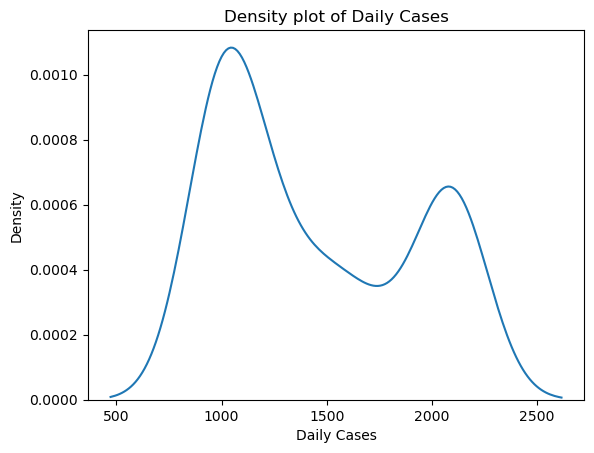

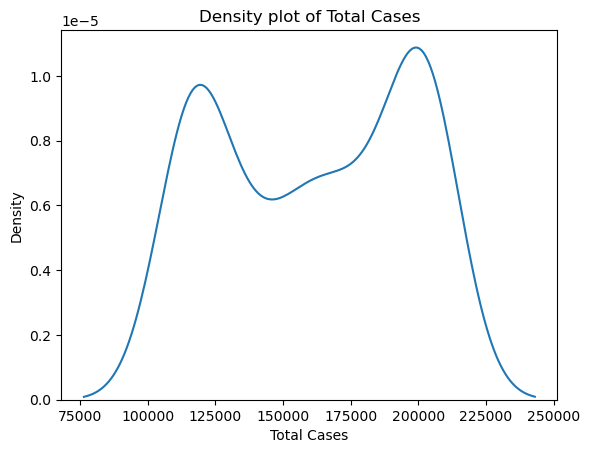

In [239]:
####################################################################data aggregation####################################################################
data = pd.read_csv('cleaned_data.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)

weekly_data = data.resample('W').sum()

monthly_data = data.resample('ME').sum()


print(data.to_string())
print("Weekly Aggregation (Sum):")
print(weekly_data[['Daily Cases', 'Total Cases']].to_string())
print("\nMonthly Aggregation (Average):")
print(monthly_data[['Daily Cases', 'Total Cases']].to_string())

for feature in ['Daily Cases', 'Total Cases']:
    sns.kdeplot(data[feature])
    plt.title(f'Density plot of {feature}')
    plt.show()

In [241]:
##################################################################data generalization######################################################################
bins = [0, 100, 1000, 5000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']

data['Daily Cases Category'] = pd.cut(data['Daily Cases'], bins=bins, labels=labels)



print("Data with Generalized 'Daily Cases' Category:")
print(data[['Daily Cases', 'Daily Cases Category']].to_string())

data['Daily Cases Category'] = pd.cut(data['Total Cases'], bins=bins, labels=labels)

print("Data with Generalized 'Daily Cases' Category:")
print(data[['Total Cases', 'Daily Cases Category']].to_string())

Data with Generalized 'Daily Cases' Category:
            Daily Cases Daily Cases Category
Date                                        
2020-03-27       2069.0                 High
2020-03-28       1704.0                 High
2020-03-29       1815.0                 High
2020-03-30       1610.0                 High
2020-03-31       2100.0                 High
2020-04-01       2100.0                 High
2020-04-02       2100.0                 High
2020-04-03       2100.0                 High
2020-04-04       2100.0                 High
2020-04-05       2100.0                 High
2020-04-06       2100.0                 High
2020-04-07       2100.0                 High
2020-04-08       2100.0                 High
2020-04-09       2100.0                 High
2020-04-10       2100.0                 High
2020-04-11       2100.0                 High
2020-04-12       2100.0                 High
2020-04-13       2100.0                 High
2020-04-14       2100.0                 High
2020-04-1

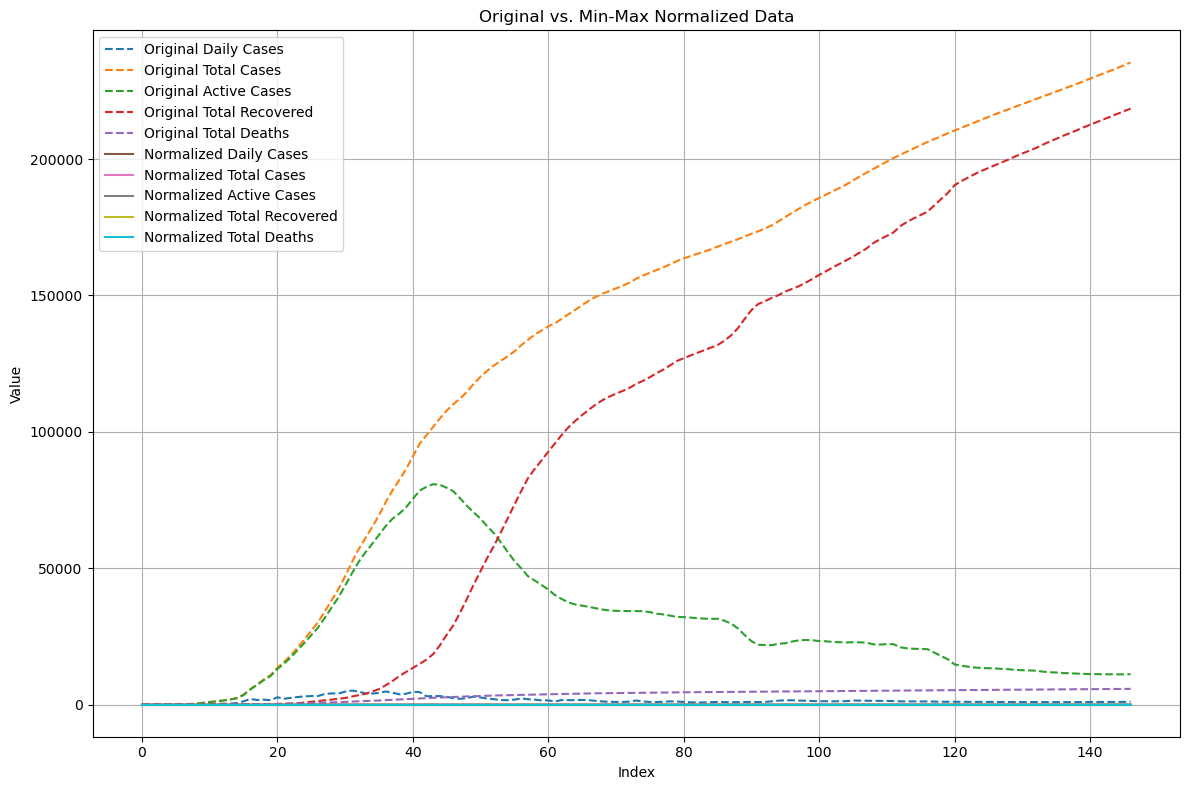

Min-Max Normalized Data (0 to 1):
     Daily Cases  Total Cases  Active Cases  Total Recovered  Total Deaths
0       0.000195     0.000000      0.000000         0.000000      0.000000
1       0.000000     0.000000      0.000000         0.000000      0.000000
2       0.000779     0.000017      0.000050         0.000000      0.000000
3       0.000195     0.000021      0.000062         0.000000      0.000000
4       0.002336     0.000072      0.000210         0.000000      0.000000
5       0.005644     0.000195      0.000569         0.000000      0.000000
6       0.009926     0.000412      0.001188         0.000000      0.000173
7       0.018100     0.000807      0.002314         0.000000      0.000520
8       0.032698     0.001521      0.004381         0.000000      0.000694
9       0.060529     0.002842      0.008168         0.000000      0.001561
10      0.053912     0.004019      0.011447         0.000000      0.003643
11      0.056248     0.005246      0.014912         0.000000      

In [265]:
###################################################################data normalization#####################################################################
columns_to_normalize = ['Daily Cases', 'Total Cases', 'Active Cases', 'Total Recovered', 'Total Deaths']

min_max_scaler = MinMaxScaler()
data_min_max = data.copy() 
data_min_max[columns_to_normalize] = min_max_scaler.fit_transform(data[columns_to_normalize])

plt.figure(figsize=(12, 8))

# Plot original data
for col in columns_to_normalize:
    plt.plot(data[col], label=f'Original {col}', linestyle='--')

# Plot Min-Max normalized data
for col in columns_to_normalize:
    plt.plot(data_min_max[col], label=f'Normalized {col}')

# Adding labels and title
plt.title('Original vs. Min-Max Normalized Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

standard_scaler = StandardScaler()
data_standard = data.copy()  
data_standard[columns_to_normalize] = standard_scaler.fit_transform(data[columns_to_normalize])
print("Min-Max Normalized Data (0 to 1):")
print(data_min_max[columns_to_normalize].to_string())

print("\nZ-Score Normalized Data (Standard Scaling):")
print(data_standard[columns_to_normalize].to_string())


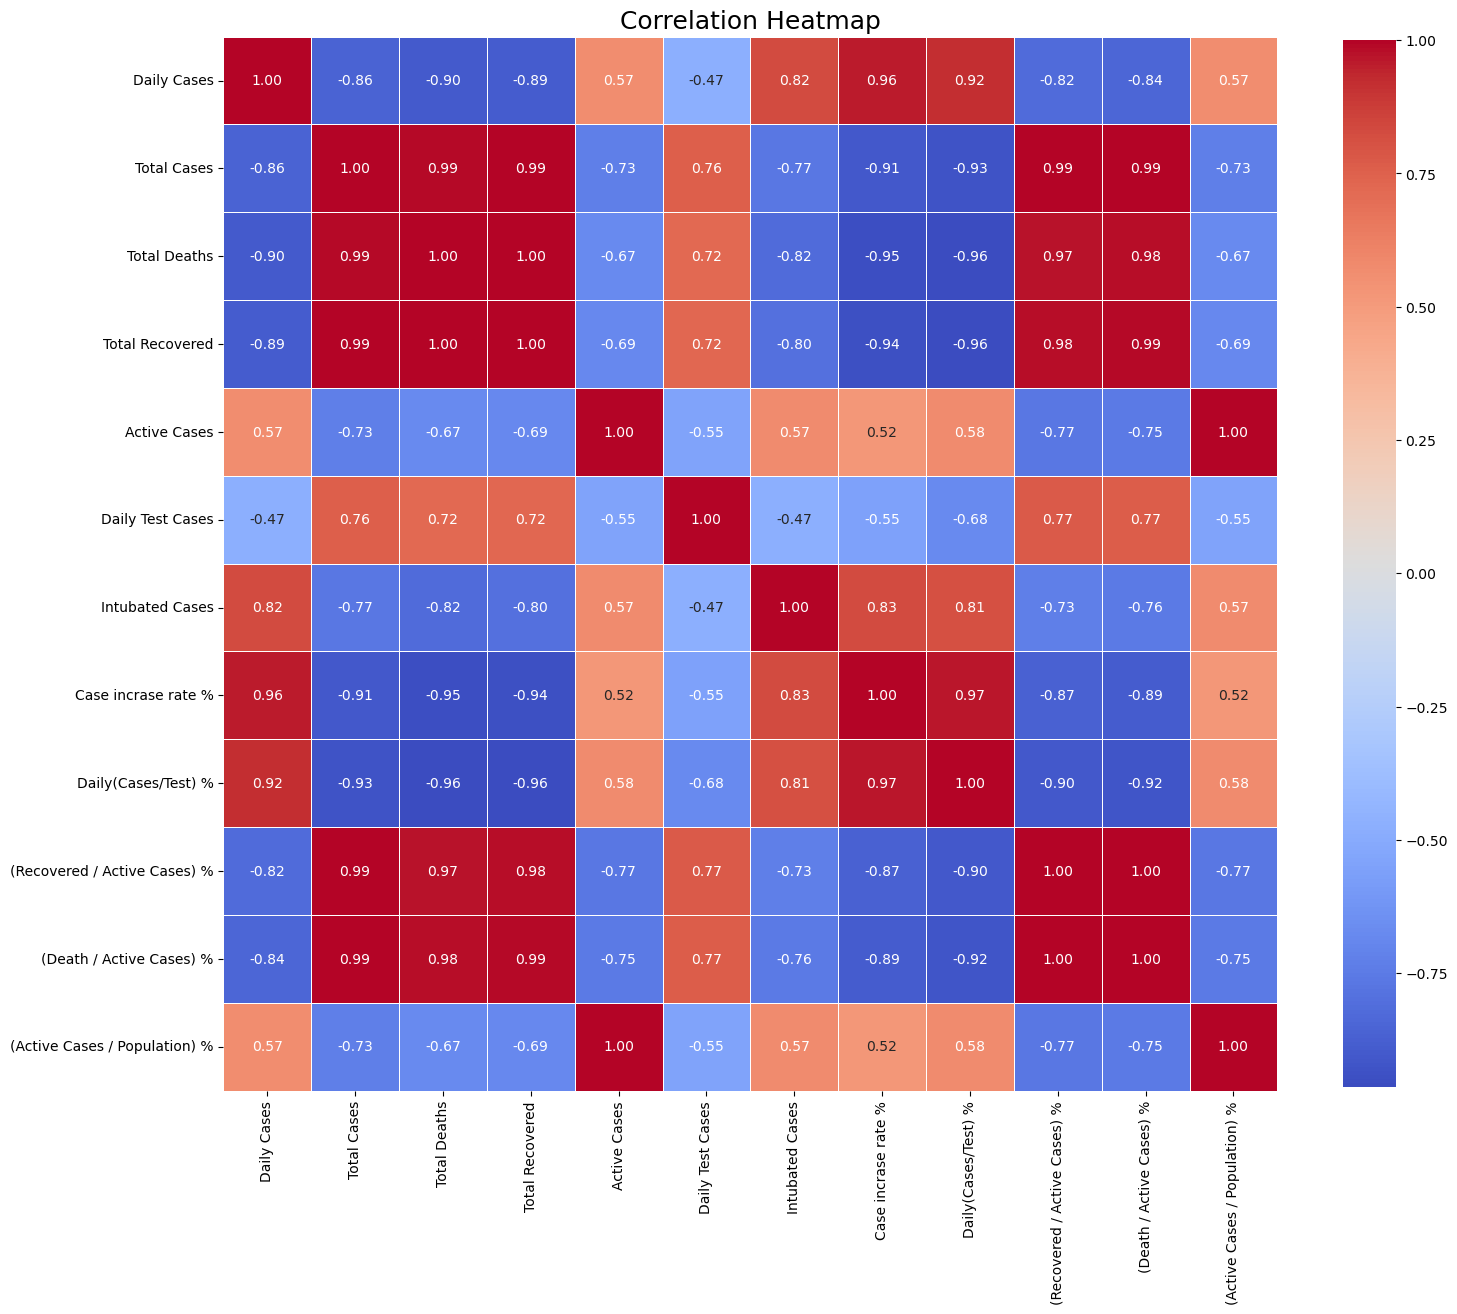

PCA Reduced Data:
          PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
0    2.811310  2.386666  2.103873  1.563417 -0.232646 -0.180626  0.018220  0.029354
1    2.581783  2.162929  2.335424  1.434697  0.242643  0.271316 -0.130412 -0.048765
2    2.704915  2.269427  2.190020  1.308320  0.148891  0.120877 -0.067030 -0.027449
3    2.805324  2.309135  1.997622  0.524278  0.634224  0.318810 -0.072327 -0.081822
4    3.289447  2.736404  1.439314  0.150856  0.163765 -0.330805  0.187206  0.014994
5    3.413885  2.826139  1.264343 -0.235363  0.282271 -0.361137  0.229630  0.009297
6    3.538243  2.669539  1.111570 -0.369394  0.280966 -0.341231  0.216429  0.004618
7    3.677464  2.340893  0.954285 -0.362593  0.204963 -0.287682  0.167037  0.000011
8    3.816002  2.013861  0.797773 -0.355825  0.129332 -0.234396  0.117887 -0.004574
9    3.963530  1.665606  0.631104 -0.348618  0.048793 -0.177651  0.065548 -0.009456
10   4.110164  1.319461  0.465445 -0.341454 -0.031258 -0.1

In [245]:
######################################################################data reduction######################################################################3
columns_for_pca = ['Daily Cases', 'Total Cases', 'Active Cases', 'Total Recovered', 'Total Deaths','Daily Test Cases','Intubated Cases','Case incrase rate %','Daily(Cases/Test) %','(Recovered / Active Cases) %','(Death / Active Cases) %','(Active Cases / Population) %']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns_for_pca])
pca = PCA(n_components=8)  
data_pca = pca.fit_transform(data_scaled)
correlation = data.iloc[:,:-1].corr()

plt.figure(figsize=(17, 17))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8'])
print("PCA Reduced Data:")
print(pca_df.to_string())

        Date  Daily Cases  Total Cases  Total Deaths  Total Recovered  \
0 2020-03-27       2069.0       116121        3036.5          41424.5   
1 2020-03-28       1704.0       116121        3036.5          41424.5   
2 2020-03-29       1815.0       116121        3036.5          41424.5   
3 2020-03-30       1610.0       116121        3036.5          41424.5   
4 2020-03-31       2100.0       116121        3036.5          41424.5   

   Active Cases  Daily Test Cases  Intubated Cases  Case incrase rate %  \
0         15844             33120              364                2.165   
1         15844             33120              364                2.165   
2         15844             33120              394                2.165   
3         15844             33120              523                2.165   
4         15844             33120              622                2.165   

   Daily(Cases/Test) %  (Recovered / Active Cases) %  \
0                7.455                         57.89  

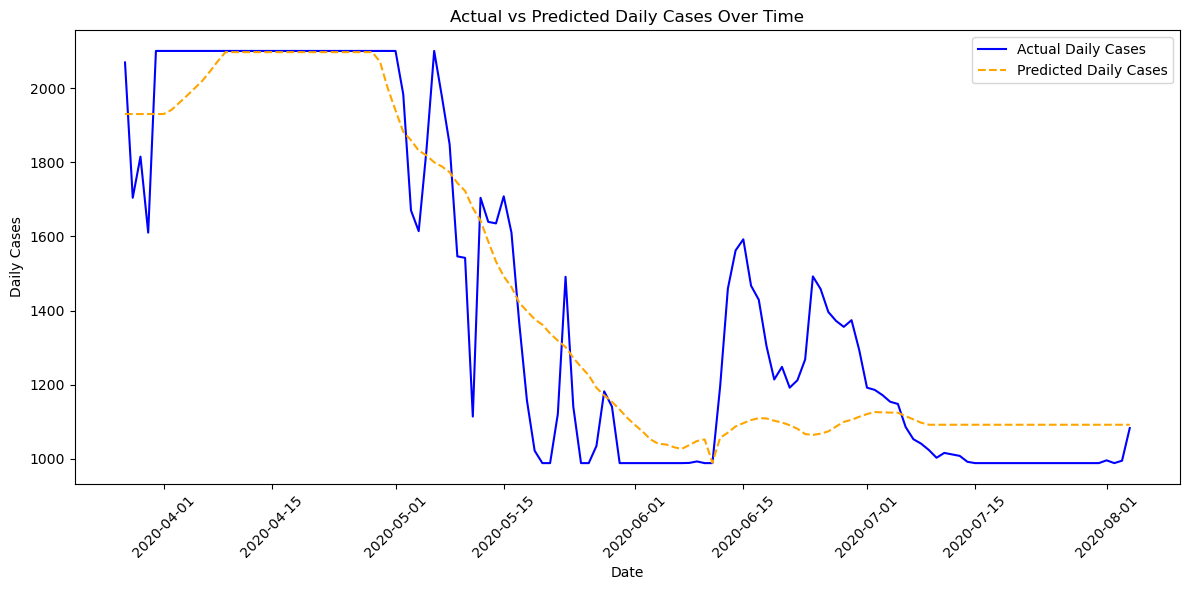

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('cleaned_data.csv')
data['Date'] = pd.to_datetime(data['Date'])  
target = 'Daily Cases'
features = ['Total Cases', 'Active Cases', 'Total Recovered', 'Total Deaths']  # Adjust this to fit your dataset's columns

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
data['Predicted Daily Cases'] = model.predict(X)
data.sort_values(by='Date', inplace=True)
print(data.head())
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Daily Cases'], label='Actual Daily Cases', color='blue')
plt.plot(data['Date'], data['Predicted Daily Cases'], label='Predicted Daily Cases', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Daily Cases')
plt.title('Actual vs Predicted Daily Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()